In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amazon = pd.read_csv("C:\\Users\\pavel\\OneDrive\\Desktop\Sem 4\\Capstone Project 2\\Amazon Sale Report.csv")

C:\Users\pavel\AppData\Local\Temp\ipykernel_372\3404743497.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv("C:\\Users\\pavel\\OneDrive\\Desktop\Sem 4\\Capstone Project 2\\Amazon Sale Report.csv")


In [3]:
amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
import missingno as msno

In [7]:
amazon.set_index('index', inplace = True)

### checking null values

<AxesSubplot:>

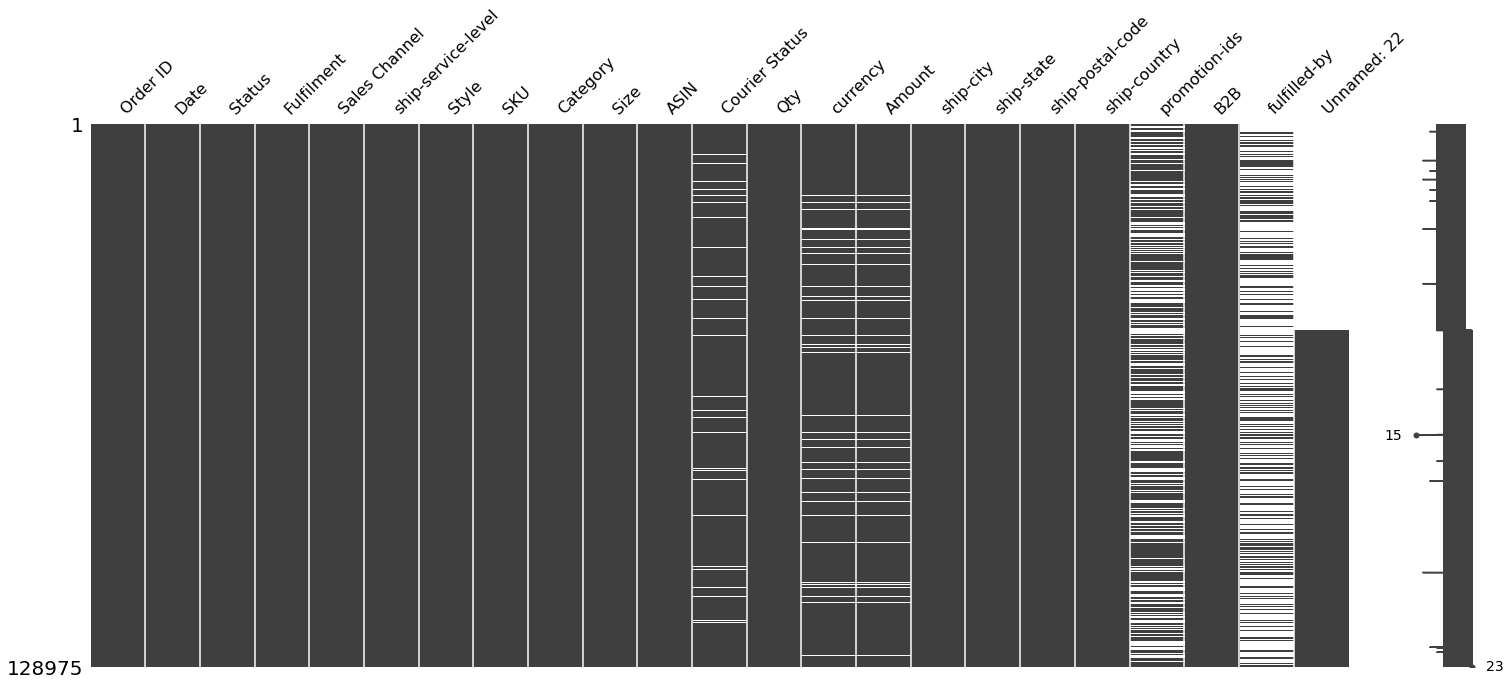

In [8]:
msno.matrix(amazon)

<AxesSubplot:>

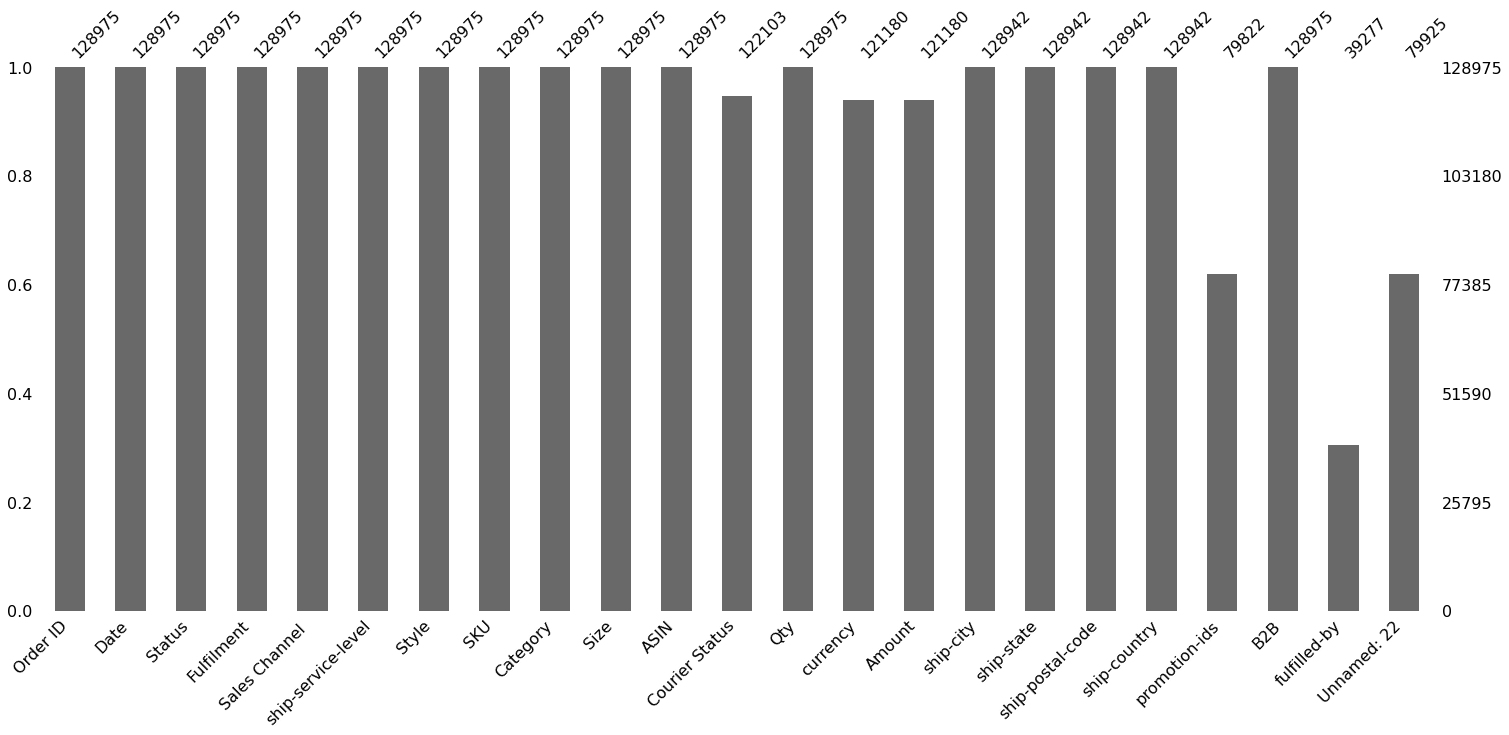

In [9]:
msno.bar(amazon)

## Checking unique values

In [10]:
amazon.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [11]:
amazon.apply(pd.unique)

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
currency                                                     [IN

## Dropping unnecessary Columns

In [12]:
amazon.drop(columns = ['Unnamed: 22','fulfilled-by','ship-country', 'currency',], inplace = True)

In [13]:
amazon=amazon[amazon['Sales Channel ']=='Amazon.in']

## Checking and removing duplicate rows

In [14]:
before_remove_duplicates = len(amazon)

In [15]:
amazon.drop_duplicates(inplace = True)
after_remove_duplicates = len(amazon)
duplicate_rows_removed = before_remove_duplicates - after_remove_duplicates
print(f'{duplicate_rows_removed} duplicate rows have been removed! \nThe Dataset now has {after_remove_duplicates} rows.')

6 duplicate rows have been removed! 
The Dataset now has 128845 rows.


In [16]:
amazon[amazon.isnull().any(axis = 1)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False


In [17]:
amazon[amazon['promotion-ids'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-S,kurta,S,B07K3YQLF1,Shipped,1,685.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False


## Handling Missing Values in different Columns according to the need

In [18]:
amazon['promotion-ids'].fillna('no promotion', inplace = True)

In [19]:
amazon['Courier Status'].fillna('unknown', inplace = True)

In [20]:
amazon[amazon['Amount'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,unknown,0,NaN,GUWAHATI,ASSAM,781003.0,no promotion,False
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,Dahod,Gujarat,389151.0,no promotion,False
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,HYDERABAD,TELANGANA,500072.0,no promotion,False
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,PUNE,MAHARASHTRA,411046.0,no promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,406-3923120-4345139,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,no promotion,False
128907,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,no promotion,False
128908,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,no promotion,False


In [21]:
amazon['Amount'].fillna(0, inplace = True)

<AxesSubplot:>

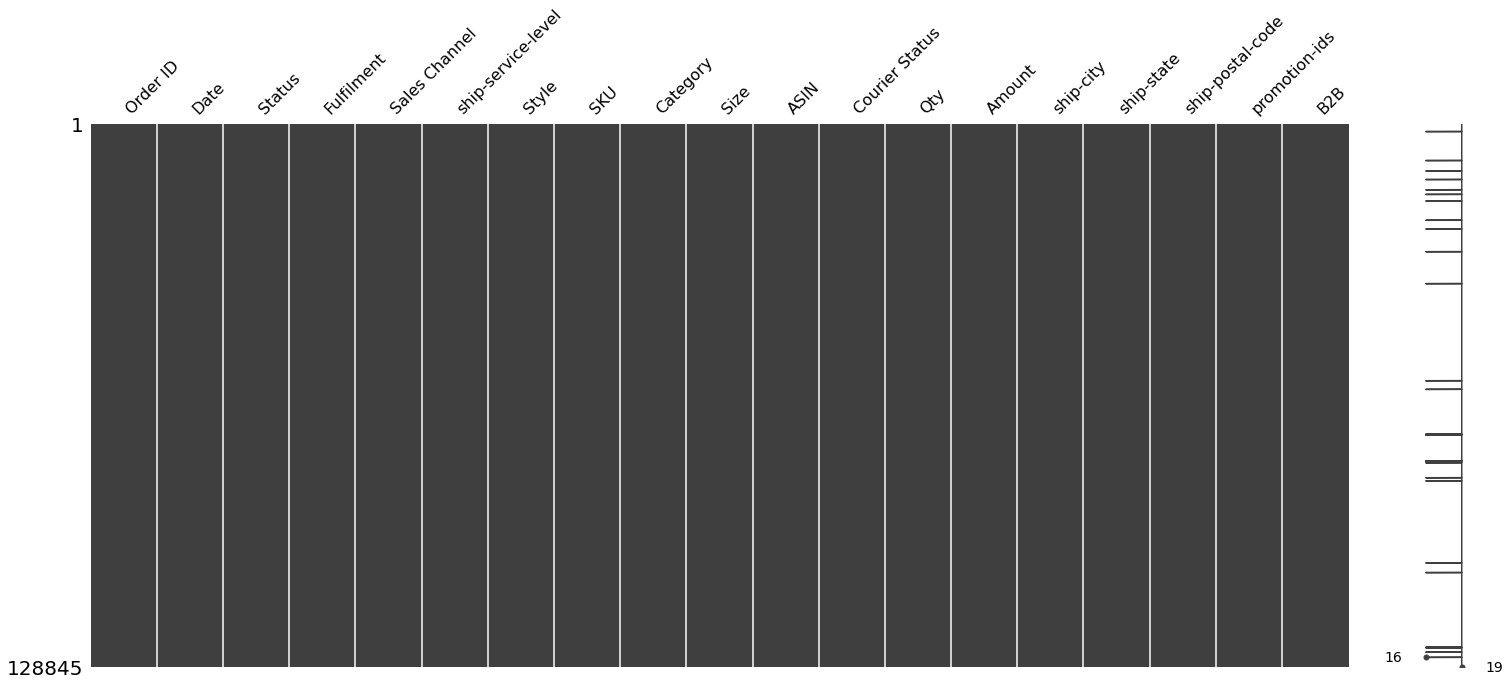

In [22]:
msno.matrix(amazon)

In [23]:
amazon[amazon['ship-city'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,NaN,NaN,NaN,no promotion,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,unknown,0,380.0,NaN,NaN,NaN,no promotion,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False


In [24]:
amazon['ship-city'].fillna('unknown', inplace = True)
amazon['ship-state'].fillna('unknown', inplace = True)
amazon['ship-postal-code'].fillna('unknown', inplace = True)

<AxesSubplot:>

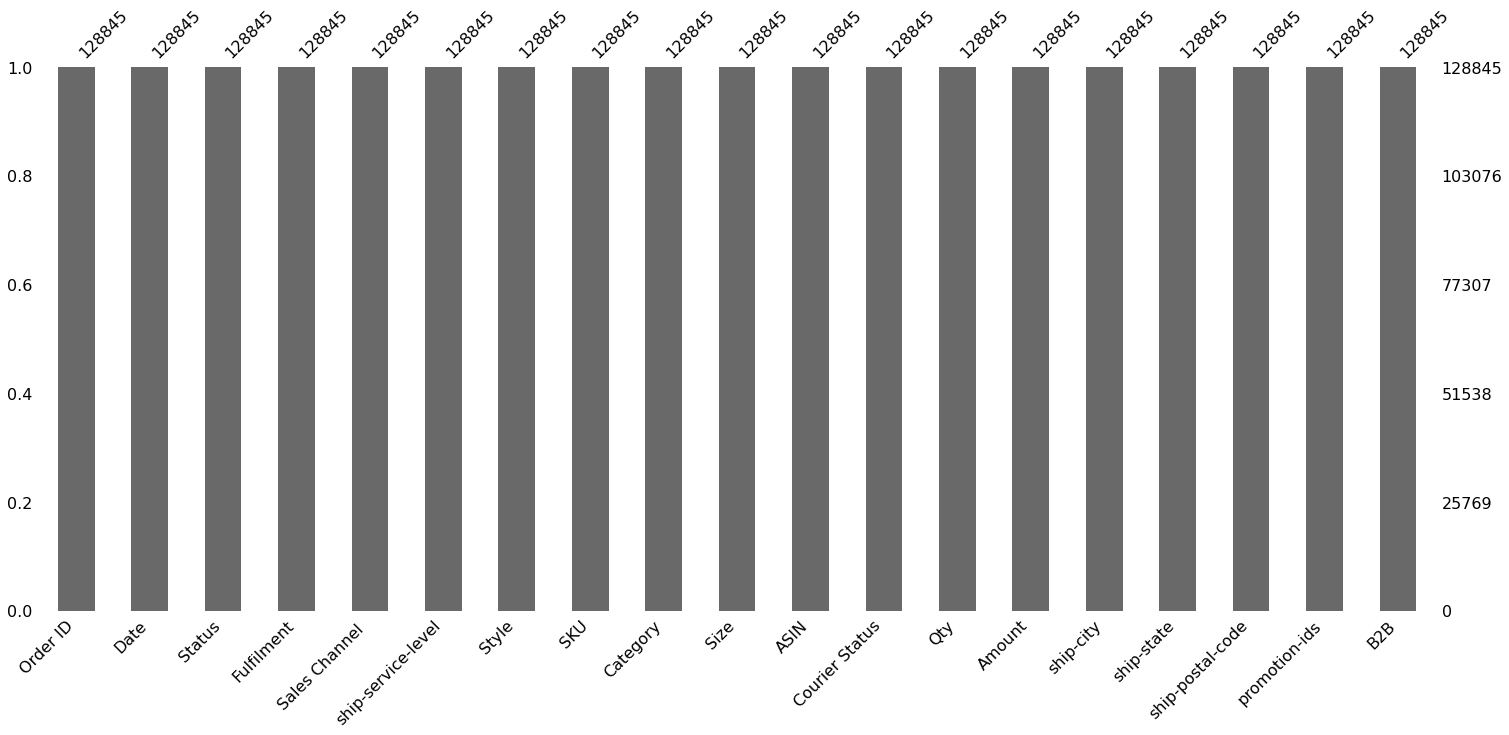

In [25]:
msno.bar(amazon)

In [26]:
amazon.dtypes


Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
promotion-ids          object
B2B                      bool
dtype: object

## Handling datatype for Date Column

In [27]:
amazon['Date'] = pd.to_datetime(amazon['Date'])

## Renaming all the columns

In [28]:
mapper = {'Order ID':'orderID', 'Date':'date', 'Status':'shipStatus','Fullfilment':'fullfilment','Sales Channel':'sales_channel', 'ship-service-level':'serviceLevel', 'Style':'style', 'SKU':'sku', 'Category':'productCategory', 'Size':'size', 'ASIN':'asin', 'Courier Status':'courierShipStatus', 'Qty':'orderQuantity', 'Amount':'orderAmount (INR)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 'promotion-ids':'promotion','B2B':'customerType' }
amazon.rename(columns = mapper, inplace = True)
amazon.head()

,orderID,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False


## Handling CustomerType Column

In [29]:
amazon['customerType'].replace([True, False], ['business', 'consumer'], inplace = True)
amazon.head()

,orderID,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer


## Dataset is fully cleaned and is ready to be used for Visulizations in Tableau and for training the Machine Learning Model.